In [4]:
import pandas as pd
import numpy as np

In [5]:
from collections import Counter

In [3]:
genesis = pd.read_csv('./N_genesis_crawling_fin.csv', sep='|', encoding = 'utf-8')

In [4]:
genesis

,magazine,title,link,date,content,title_brand,word_genesis
0,N,제네시스 GV70 12월 출시...싼타페 실내보다 클까?,https://news.naver.com/main/read.nhn?mode=LSD&...,2020-12-04,['[이데일리 오토in] 카가이 남현수 기자= 제네시스가 이 달에 중형 SUV GV...,1,['[이데일리 오토in] 카가이 남현수 기자= 제네시스가 이 달에 중형 SUV GV...
1,N,제네시스 'GV70' 곧 출시… 8일 온라인 공개 행사,https://news.naver.com/main/read.nhn?mode=LSD&...,2020-12-03,"[""현대자동차그룹 고급 브랜드 제네시스의 SUV 'GV70'이 이달 출시된다. 현대...",1,"[""현대자동차그룹 고급 브랜드 제네시스의 SUV 'GV70'이 이달 출시된다. 현대..."
2,N,현대차 수출 단가 대당 2만달러 시대 '초읽기',https://news.naver.com/main/read.nhn?mode=LSD&...,2020-11-29,['1∼10월 수출 단가 1만9천386달러SUV·제네시스 등 고가차량 수출 늘어 국...,0,"[""['1∼10월 수출 단가 1만9천386달러SUV·제네시스 등 고가차량 수출 늘어..."
3,N,"제네시스 GV70, 오는 8일 디지털 공개행사",https://news.naver.com/main/read.nhn?mode=LSD&...,2020-12-02,"['2.2ℓ 디젤, 2.5ℓ 가솔린 터보, 3.5ℓ 가솔린 터보 스포츠 모델로 출시...",1,"['2.2ℓ 디젤, 2.5ℓ 가솔린 터보, 3.5ℓ 가솔린 터보 스포츠 모델로 출시..."
4,N,국산차 수출 단가 2만달러 육박,https://news.naver.com/main/read.nhn?mode=LSD&...,2020-11-30,"['[스포츠경향] 제네시스', '국산차 수출 판매 단가 평균이 2만달러에 육박하는 ...",0,"[""['[스포츠경향] 제네시스"", '세단보다 가격이 높은 SUV 수출이 늘어나며 대..."
...,...,...,...,...,...,...,...
1549,N,현대차 제네시스 사업부장에 해외통 이용우 부사장 선임,https://news.naver.com/main/read.nhn?mode=LSD&...,2019-10-29,['현대차는 피츠제럴드 부사장이 이달 초 사임 의사를 사측에 전하면서 이 부사장을 ...,1,['현대차는 피츠제럴드 부사장이 이달 초 사임 의사를 사측에 전하면서 이 부사장을 ...
1550,N,"3년 만에 실적 반등 현대차 ""美 가속페달 더 밟는다""",https://news.naver.com/main/read.nhn?mode=LSD&...,2020-01-12,"[""그래픽 유정수 디자인기자 현대자동차(제네시스 브랜드 포함)가 세계 자동차 시장 ...",0,"['[""그래픽 유정수 디자인기자 현대자동차(제네시스 브랜드 포함)가 세계 자동차 시..."
1551,N,현대·기아차 신형 엔진 공개… ‘GV80’ 첫 장착 유력,https://news.naver.com/main/read.nhn?mode=LSD&...,2019-10-23,['현대자동차그룹이 23일 신형 대형엔진 2종을 공개했다. 다음달 출시되는 제네시스...,1,['현대자동차그룹이 23일 신형 대형엔진 2종을 공개했다. 다음달 출시되는 제네시스...
1552,N,"""이노션, 제네시스 풀 라인업 확보…마케팅 활발해질 것""-NH",https://news.naver.com/main/read.nhn?mode=LSD&...,2020-01-02,"['NH투자증권은 2일 현대자동차그룹의 광고계열사 이노션에 대해 ""제네시스 풀 라인...",1,"['NH투자증권은 2일 현대자동차그룹의 광고계열사 이노션에 대해 ""제네시스 풀 라인..."


# 전처리

## 기호삭제

In [5]:
genesis['word_genesis'] = genesis['word_genesis'].str.replace('[', '').str.replace(']', '').str.replace('\\', '').str.replace('"', '').str.replace("'", "").str.replace('「', '').str.replace('」', '').str.replace('”', '').str.replace('‘', '').str.replace('“', '')

In [6]:
genesis['word_genesis'][0]

'이데일리 오토in 카가이 남현수 기자= 제네시스가 이 달에 중형 SUV GV70을 출시한다. 올해 제네시스는 GV80부터 시작해, G80, G70 부분변경 등 다양한 신차를 쏟아내면서 내수 시장에서 호평을 받고 있다. 업계에 따르면 GV70은 이 달 8~10일 공식 출시된다. GV70 100여대는 10월부터 위장막을 벗고 도로를 활보하며 노이즈 마케팅을 진행하고 있다. GV70 실물 디자인을 접한 소비자들은 제대로 된 프리미엄 SUV가 나왔다’는 반응을 보인다., GV70은 제네시스의 디자인 아이덴티티인 두 줄 헤드램프와 테일램프를 적용한다. 전면 그릴은 오각 크레스트 형태로 전면부를 꽉 채운다. 측면은 최근 유행하는 쿠페형 스타일이다. 후륜 구동 특유의 짧은 프런트 오버행과 긴 휠베이스로 유려한 비율을 자랑한다. 실내 역시 최신 제네시스와 유사한 구성이다. 엔트리 SUV임에도 프리미엄을 지향하는 제네시스의 신차답게 12.3인치 계기반과 플로팅 타입의 14.5인치 센터 디스플레이를 장착한다. 소재 역시 고급으로 스웨이드 마감과 더불어 나파 가죽 시트를 적용한다., 최신 장비도 대폭 강화된다. 센터페시아에 지문 인식 시스템을 심어 현대자동차그룹의 차내 결제 서비스인 카페이’를 사용할 수 있게 했다. 지문인식 시동도 가능하다. 지문인식으로 운전자의 정보를 감지해 시트, 헤드업디스플레이, 내비게이션 최근 목적지, 인포테인먼트 음량 등이 자동으로 설정된다. 또한 패밀리카를 지향하는 만큼 차량 고성능 레이더 센서를 적용해 뒷좌석과 화물공간의 움직임을 감지한다. 차량 내에 반려견이나 어린 아이가 방치됐을 때 우선 계기반에 알림이 뜬다. 이어 2차 비상등과 경고음, 문자 메시지로 운전자에게 위험을 알린다., 제네시스는 G70부터 시작해 G80, G90과 같은 세단과 SUV인 GV80을 출시하며 라인업을 확장한다. GV70까지 출시된다면 판매량이 더욱 빠르게 상승할 것으로 업계는 내다보고 있다. GV70은 G70과 플랫폼을 공유하지만 2열을 넉넉하게 확보했다. 좁은 뒷좌석

## 디자이너명 브랜드명 replace

## list(article_list) 생성 후 append

In [9]:
contents_list = []

In [10]:

article_list = []
for word in genesis['word_genesis']:
    article_list.append(word)

In [11]:
len(article_list)

1554

In [12]:
article_list[6]

'현지 매체 잘 만든 럭셔리 SUV 호평, 제네시스의 대형 스포츠유틸리티차량(SUV) GV80가 연내 미국 출시를 앞두고 현지에서 사전 계약 2만대를 달성하는 등 판매 전부터 인기를 끌고 있다. 미국 자동차 전문 매체들의 호평도 이어지고 있다. 국내 고급차 시장을 평정한 제네시스가 럭셔리 브랜드 격전지인 미국 시장까지 공략할 수 있을지 주목된다., 15일 현대자동차그룹에 따르면 GV80의 미국 사전계약 물량이 최근 2만대를 달성했다. 기존 G70, G80, G90의 지난해 미국 판매량이 총 2만1000여대인 점을 감안하면 GV80에 대한 현지 소비자들의 관심은 매우 높은 수준이다. 현대차는 2016년 미국에 제네시스를 내놨지만, SUV 라인업이 없어 판매를 크게 늘리는 데 한계가 있었다. 미국 승용차시장은 SUV가 60%를 차지하고 있다., GV80는 지난달 시승 행사에 참여한 현지 매체들로부터도 큰 호평을 받고 있다. 강력한 엔진과 정숙성, 편안한 주행 성능과 고급스러운 실내외 디자인 등 시장에서 요구하는 것을 모두 갖춘, 잘 만든 럭셔리 SUV’라는 게 전반적인 평가다. 자동차 미디어 모터1’은 6기통 트윈터보 엔진에 대해 급가속 때 발생하는 매끄러운 엔진음은 세련된 럭셔리 자동차에 어울리는 주행 경험을 연출한다고 평가했다., 현지 매체들은 동급 최고의 실내 소음 수준에도 주목했다. 카앤드라이버’는 우리는 시속 113km로 주행 중인 GV80의 실내에서 66dB의 소음을 측정했다. 이 수치는 최고급 세단인 메르세데스-마이바흐 S560보다 겨우 1dB 큰 것이라고 평가했다., GV80가 제네시스 브랜드 가치를 한층 끌어올릴 것이라는 기대도 나온다. 자동차업계 관계자는 GV80는 미국 소비자가 선호하는 대형 SUV인 만큼 판매도 기대되지만, 제네시스가 미국에서 세단부터 SUV까지 아우르는 라인업을 갖춤에 따라 한층 높은 경쟁력을 확보하게 될 것이라고 말했다., 경쟁자는 물론 만만치 않다. 메르세데스벤츠 GLE450, BMW X5, 링컨 에비에이터, 캐딜락 XT

## 트위터 패키지 안에 konlpy 모듈 호출

In [13]:
from konlpy.tag import Twitter

In [14]:
twitter = Twitter()

C:\Users\wnsgo\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


### 각 문장별로 형태소 구분하기

In [15]:
sentences_tag = []

for sentence in article_list:
    morph = twitter.pos(sentence)
    sentences_tag.append(morph)
    
    

print(len(sentences_tag))


1554


In [16]:
sentences_tag[0]

[('이데일리', 'Noun'),
 ('오토', 'Noun'),
 ('in', 'Alpha'),
 ('카가이', 'Verb'),
 ('남현수', 'Noun'),
 ('기자', 'Noun'),
 ('=', 'Punctuation'),
 ('제네시스', 'Noun'),
 ('가', 'Josa'),
 ('이', 'Noun'),
 ('달', 'Noun'),
 ('에', 'Josa'),
 ('중형', 'Noun'),
 ('SUV', 'Alpha'),
 ('GV', 'Alpha'),
 ('70', 'Number'),
 ('을', 'Josa'),
 ('출시', 'Noun'),
 ('한다', 'Verb'),
 ('.', 'Punctuation'),
 ('올해', 'Noun'),
 ('제네시스', 'Noun'),
 ('는', 'Josa'),
 ('GV', 'Alpha'),
 ('80', 'Number'),
 ('부터', 'Noun'),
 ('시작', 'Noun'),
 ('해', 'Verb'),
 (',', 'Punctuation'),
 ('G', 'Alpha'),
 ('80', 'Number'),
 (',', 'Punctuation'),
 ('G', 'Alpha'),
 ('70', 'Number'),
 ('부분', 'Noun'),
 ('변경', 'Noun'),
 ('등', 'Noun'),
 ('다양한', 'Adjective'),
 ('신차', 'Noun'),
 ('를', 'Josa'),
 ('쏟아내면서', 'Verb'),
 ('내', 'Determiner'),
 ('수', 'Noun'),
 ('시장', 'Noun'),
 ('에서', 'Josa'),
 ('호평', 'Noun'),
 ('을', 'Josa'),
 ('받고', 'Verb'),
 ('있다', 'Adjective'),
 ('.', 'Punctuation'),
 ('업계', 'Noun'),
 ('에', 'Josa'),
 ('따르면', 'Verb'),
 ('GV', 'Alpha'),
 ('70', 'Number'),
 ('

In [17]:
twitter.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

### stopword 추가

In [6]:
sw_df = pd.read_csv('stopwords.csv', header=None)

In [7]:
sw_df.columns = ['stopword']

In [8]:
stop_words = []
for sw in sw_df['stopword']:
    stop_words.append(sw)

In [9]:
print(len(stop_words))
print(type(stop_words))

675
<class 'list'>


In [10]:
stop_words[-10:]

['둘', '셋', '넷', '다섯', '여섯', '일곱', '여덟', '아홉', '령', '영']

In [11]:
add_0 = []
for w in add_0:
    stop_words.append(w)

In [12]:
stop_words

['아',
 '휴',
 '아이구',
 '아이쿠',
 '아이고',
 '어',
 '나',
 '우리',
 '저희',
 '따라',
 '의해',
 '을',
 '를',
 '에',
 '의',
 '가',
 '으로',
 '로',
 '에게',
 '뿐이다',
 '의거하여',
 '근거하여',
 '입각하여',
 '기준으로',
 '예하면',
 '예를 들면',
 '예를 들자면',
 '저',
 '소인',
 '소생',
 '저희',
 '지말고',
 '하지마',
 '하지마라',
 '다른',
 '물론',
 '또한',
 '그리고',
 '비길수 없다',
 '해서는 안된다',
 '뿐만 아니라',
 '만이 아니다',
 '만은 아니다',
 '막론하고',
 '관계없이',
 '그치지 않다',
 '그러나',
 '그런데',
 '하지만',
 '든간에',
 '논하지 않다',
 '따지지 않다',
 '설사',
 '비록',
 '더라도',
 '아니면',
 '만 못하다',
 '하는 편이 낫다',
 '불문하고',
 '향하여',
 '향해서',
 '향하다',
 '쪽으로',
 '틈타',
 '이용하여',
 '타다',
 '오르다',
 '제외하고',
 '이 외에',
 '이 밖에',
 '하여야',
 '비로소',
 '한다면 몰라도',
 '외에도',
 '이곳',
 '여기',
 '부터',
 '기점으로',
 '따라서',
 '할 생각이다',
 '하려고하다',
 '이리하여',
 '그리하여',
 '그렇게 함으로써',
 '하지만',
 '일때',
 '할때',
 '앞에서',
 '중에서',
 '보는데서',
 '으로써',
 '로써',
 '까지',
 '해야한다',
 '일것이다',
 '반드시',
 '할줄알다',
 '할수있다',
 '할수있어',
 '임에 틀림없다',
 '한다면',
 '등',
 '등등',
 '제',
 '겨우',
 '단지',
 '다만',
 '할뿐',
 '딩동',
 '댕그',
 '대해서',
 '대하여',
 '대하면',
 '훨씬',
 '얼마나',
 '얼마만큼',
 '얼마큼',
 '남짓',
 '여',
 '얼마간',
 '약간',
 '다소',
 '좀',
 '조

### 1. 명사 혹은 형용사인 품사만 선별해 리스트에 담기

In [25]:
noun_adj_list= []
for sentence1 in sentences_tag:
    for word, tag in sentence1:
        if tag in ['Noun', 'Adjective', 'Alpha', 'Determiner', 'Foreign', 'Number']:
            if not word in stop_words:
                noun_adj_list.append(word)

In [26]:
len(noun_adj_list)

393235

In [27]:
noun_adj_list[:20]

['이데일리',
 '오토',
 'in',
 '남현수',
 '기자',
 '제네시스',
 '달',
 '중형',
 'SUV',
 'GV',
 '70',
 '출시',
 '올해',
 '제네시스',
 'GV',
 '80',
 '시작',
 'G',
 '80',
 'G']

In [28]:
noun_adj_list[:10]

['이데일리', '오토', 'in', '남현수', '기자', '제네시스', '달', '중형', 'SUV', 'GV']

In [29]:
ADFN_list= []
for sentence1 in sentences_tag:
    words = []
    for word, tag in sentence1:
        if tag in ['Adjective', 'Determiner','Foreign','Noun', 'Alpha', 'Number']:
            if word not in stop_words:
                words.append(word)
    ADFN_list.append(words)

In [30]:
len(ADFN_list)

1554

In [31]:
ADFN_list[0]

['이데일리',
 '오토',
 'in',
 '남현수',
 '기자',
 '제네시스',
 '달',
 '중형',
 'SUV',
 'GV',
 '70',
 '출시',
 '올해',
 '제네시스',
 'GV',
 '80',
 '시작',
 'G',
 '80',
 'G',
 '70',
 '부분',
 '변경',
 '다양한',
 '신차',
 '내',
 '수',
 '시장',
 '호평',
 '업계',
 'GV',
 '70',
 '은',
 '달',
 '8~10일',
 '공식',
 '출시',
 'GV',
 '70',
 '100',
 '여대',
 '10월',
 '위장',
 '막',
 '도로',
 '활보',
 '노이즈',
 '마케팅',
 '진행',
 'GV',
 '70',
 '실물',
 '디자인',
 '접',
 '소비자',
 '제대로',
 '프리미엄',
 'SUV',
 '반응',
 'GV',
 '70',
 '은',
 '제네시스',
 '디자인',
 '아이덴티티',
 '두',
 '줄',
 '헤드',
 '램프',
 '테',
 '램프',
 '적용',
 '전면',
 '그릴',
 '오각',
 '크레스트',
 '형태',
 '전면',
 '꽉',
 '측면',
 '최근',
 '유행',
 '쿠페',
 '스타일',
 '후륜',
 '구동',
 '특유',
 '짧은',
 '프런트',
 '오버',
 '행',
 '휠',
 '베이스',
 '유려',
 '비율',
 '자랑',
 '실내',
 '역시',
 '최신',
 '제네시스',
 '유사한',
 '구성',
 '엔트리',
 'SUV',
 '임',
 '프리미엄',
 '지향',
 '제네시스',
 '신차',
 '답',
 '12.3',
 '인치',
 '계',
 '기반',
 '플로',
 '팅',
 '타입',
 '14.5',
 '인치',
 '센터',
 '디스플레이',
 '장',
 '착한다',
 '소재',
 '역시',
 '고급',
 '스웨이드',
 '마감',
 '나파',
 '가죽',
 '시트',
 '적용',
 '최신',
 '장비',
 '대폭',
 '강화',
 '센터',
 '페',
 '시아

In [32]:
genesis['ADFN'] = ADFN_list

### 선별된 품사별 빈도수 계산 & 상위 빈도 10위까지 출력

In [33]:
word = Counter(noun_adj_list)
print(word.most_common(200))

[('제네시스', 8647), ('80', 8235), ('GV', 6870), ('현대차', 3569), ('G', 3559), ('모델', 3413), ('출시', 3370), ('SUV', 3295), ('차량', 2938), ('판매', 2793), ('수', 2713), ('브랜드', 2704), ('차', 2403), ('디자인', 2372), ('시장', 2193), ('자동차', 2024), ('적용', 2023), ('주행', 1911), ('기술', 1689), ('70', 1561), ('은', 1555), ('엔진', 1458), ('국내', 1450), ('3', 1379), ('올해', 1253), ('있는', 1233), ('신차', 1194), ('2', 1180), ('디젤', 1166), ('내', 1137), ('고객', 1101), ('미국', 1052), ('터보', 1040), ('변경', 996), ('가격', 973), ('시스템', 966), ('고급', 965), ('생산', 956), ('대형', 943), ('가솔린', 933), ('통해', 932), ('말', 907), ('세단', 895), ('첫', 892), ('예정', 874), ('그룹', 871), ('중', 862), ('운전자', 845), ('1', 839), ('위', 812), ('스포츠', 807), ('벤츠', 806), ('소음', 781), ('감', 780), ('두', 775), ('5', 766), ('기아차', 760), ('지난', 755), ('시작', 748), ('공장', 746), ('개', 739), ('세대', 737), ('달', 727), ('부분', 727), ('현대', 713), ('라인업', 708), ('신형', 705), ('최초', 685), ('기능', 684), ('라인', 683), ('공개', 680), ('프리미엄', 678), ('실내', 677), ('역', 675), ('더', 6

In [34]:
# # 한 글자인 단어는 제외

# for i, v in enumerate(noun_adj_list):
#     if len(v)<2:
#         noun_adj_list.pop(i)

In [35]:
count = Counter(noun_adj_list)

In [36]:
word_list = count.most_common(200)
for v in word_list:
    print(v)

('제네시스', 8647)
('80', 8235)
('GV', 6870)
('현대차', 3569)
('G', 3559)
('모델', 3413)
('출시', 3370)
('SUV', 3295)
('차량', 2938)
('판매', 2793)
('수', 2713)
('브랜드', 2704)
('차', 2403)
('디자인', 2372)
('시장', 2193)
('자동차', 2024)
('적용', 2023)
('주행', 1911)
('기술', 1689)
('70', 1561)
('은', 1555)
('엔진', 1458)
('국내', 1450)
('3', 1379)
('올해', 1253)
('있는', 1233)
('신차', 1194)
('2', 1180)
('디젤', 1166)
('내', 1137)
('고객', 1101)
('미국', 1052)
('터보', 1040)
('변경', 996)
('가격', 973)
('시스템', 966)
('고급', 965)
('생산', 956)
('대형', 943)
('가솔린', 933)
('통해', 932)
('말', 907)
('세단', 895)
('첫', 892)
('예정', 874)
('그룹', 871)
('중', 862)
('운전자', 845)
('1', 839)
('위', 812)
('스포츠', 807)
('벤츠', 806)
('소음', 781)
('감', 780)
('두', 775)
('5', 766)
('기아차', 760)
('지난', 755)
('시작', 748)
('공장', 746)
('개', 739)
('세대', 737)
('달', 727)
('부분', 727)
('현대', 713)
('라인업', 708)
('신형', 705)
('최초', 685)
('기능', 684)
('라인', 683)
('공개', 680)
('프리미엄', 678)
('실내', 677)
('역', 675)
('더', 675)
('최고', 671)
('중국', 666)
('6', 664)
('업계', 660)
('수입', 656)
('판매량', 653)

## 워드클라우드 만들기

In [37]:
import matplotlib.pyplot as plt

### 패키지 설치 및 폰트 어쩌구

In [38]:
import matplotlib.font_manager as fm

# 이용 가능한 폰트 중 '고딕'만 선별
for font in fm.fontManager.ttflist:
    if 'Gothic' in font.name:
        print(font.name, font.fname)

Malgun Gothic C:\WINDOWS\Fonts\malgun.ttf
Yu Gothic C:\WINDOWS\Fonts\YuGothB.ttc
HYGothic-Extra C:\WINDOWS\Fonts\H2GTRE.TTF
Franklin Gothic Medium C:\WINDOWS\Fonts\framdit.ttf
Malgun Gothic C:\Windows\Fonts\malgunbd.ttf
Yu Gothic C:\Windows\Fonts\YuGothL.ttc
Century Gothic C:\Windows\Fonts\GOTHIC.TTF
Yu Gothic C:\Windows\Fonts\YuGothM.ttc
Yu Gothic C:\WINDOWS\Fonts\YuGothR.ttc
MS Gothic C:\WINDOWS\Fonts\msgothic.ttc
HYGothic-Medium C:\WINDOWS\Fonts\H2GTRM.TTF
Malgun Gothic C:\WINDOWS\Fonts\malgunsl.ttf
Century Gothic C:\Windows\Fonts\GOTHICI.TTF
Century Gothic C:\WINDOWS\Fonts\GOTHICBI.TTF
Century Gothic C:\Windows\Fonts\GOTHICB.TTF
Franklin Gothic Medium C:\WINDOWS\Fonts\framd.ttf


In [39]:
font_path = 'C:\WINDOWS\Fonts\malgun.ttf'

### wordcloud 그리기

In [40]:
from wordcloud import WordCloud

In [41]:
wc = WordCloud(font_path=font_path, background_color="white", width=600, height=400)

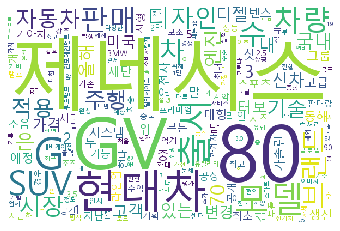

In [42]:
wc.generate_from_frequencies(dict(word_list))

plt.imshow(wc) 
plt.axis('off') 
plt.show()


wc.to_file('genesis.png')

In [43]:
genesis.to_csv('./genesis_adfn.csv', sep='|', encoding = 'utf-8', index = False)

In [62]:
genesis

,magazine,title,link,date,content,title_brand,word_genesis,ADFN
0,N,제네시스 GV70 12월 출시...싼타페 실내보다 클까?,https://news.naver.com/main/read.nhn?mode=LSD&...,2020-12-04,['[이데일리 오토in] 카가이 남현수 기자= 제네시스가 이 달에 중형 SUV GV...,1,이데일리 오토in 카가이 남현수 기자= 제네시스가 이 달에 중형 SUV GV70을 ...,"[이데일리, 오토, in, 남현수, 기자, 제네시스, 달, 중형, SUV, GV, ..."
1,N,제네시스 'GV70' 곧 출시… 8일 온라인 공개 행사,https://news.naver.com/main/read.nhn?mode=LSD&...,2020-12-03,"[""현대자동차그룹 고급 브랜드 제네시스의 SUV 'GV70'이 이달 출시된다. 현대...",1,현대자동차그룹 고급 브랜드 제네시스의 SUV GV70이 이달 출시된다. 현대차는 오...,"[현대, 자동차, 그룹, 고급, 브랜드, 제네시스, SUV, GV, 달, 출시, 현..."
2,N,현대차 수출 단가 대당 2만달러 시대 '초읽기',https://news.naver.com/main/read.nhn?mode=LSD&...,2020-11-29,['1∼10월 수출 단가 1만9천386달러SUV·제네시스 등 고가차량 수출 늘어 국...,0,1∼10월 수출 단가 1만9천386달러SUV·제네시스 등 고가차량 수출 늘어 국산차...,"[∼, 수출, 단가, SUV, 제네시스, 고가, 차량, 수출, 국산, 차, 평균, ..."
3,N,"제네시스 GV70, 오는 8일 디지털 공개행사",https://news.naver.com/main/read.nhn?mode=LSD&...,2020-12-02,"['2.2ℓ 디젤, 2.5ℓ 가솔린 터보, 3.5ℓ 가솔린 터보 스포츠 모델로 출시...",1,"2.2ℓ 디젤, 2.5ℓ 가솔린 터보, 3.5ℓ 가솔린 터보 스포츠 모델로 출시 오...","[ℓ, 디젤, ℓ, 가솔린, 터보, ℓ, 가솔린, 터보, 스포츠, 모델, 출시, 디..."
4,N,국산차 수출 단가 2만달러 육박,https://news.naver.com/main/read.nhn?mode=LSD&...,2020-11-30,"['[스포츠경향] 제네시스', '국산차 수출 판매 단가 평균이 2만달러에 육박하는 ...",0,"스포츠경향 제네시스, 세단보다 가격이 높은 SUV 수출이 늘어나며 대당 수출 가격도...","[스포츠경향, 제네시스, 세단, 가격, 높은, SUV, 수출, 대당, 수출, 가격,..."
...,...,...,...,...,...,...,...,...
1549,N,현대차 제네시스 사업부장에 해외통 이용우 부사장 선임,https://news.naver.com/main/read.nhn?mode=LSD&...,2019-10-29,['현대차는 피츠제럴드 부사장이 이달 초 사임 의사를 사측에 전하면서 이 부사장을 ...,1,현대차는 피츠제럴드 부사장이 이달 초 사임 의사를 사측에 전하면서 이 부사장을 제네...,"[현대차, 피츠제럴드, 부사, 달, 초, 사임, 의사, 전하, 면서, 부사, 제네시..."
1550,N,"3년 만에 실적 반등 현대차 ""美 가속페달 더 밟는다""",https://news.naver.com/main/read.nhn?mode=LSD&...,2020-01-12,"[""그래픽 유정수 디자인기자 현대자동차(제네시스 브랜드 포함)가 세계 자동차 시장 ...",0,그래픽 유정수 디자인기자 현대자동차(제네시스 브랜드 포함)가 세계 자동차 시장 최대...,"[그래픽, 유정수, 디자인, 기자, 현대, 자동차, 제네시스, 브랜드, 포함, 세계..."
1551,N,현대·기아차 신형 엔진 공개… ‘GV80’ 첫 장착 유력,https://news.naver.com/main/read.nhn?mode=LSD&...,2019-10-23,['현대자동차그룹이 23일 신형 대형엔진 2종을 공개했다. 다음달 출시되는 제네시스...,1,현대자동차그룹이 23일 신형 대형엔진 2종을 공개했다. 다음달 출시되는 제네시스 첫...,"[자동차, 그룹, 신형, 대형, 엔진, 종, 공개, 달, 출시, 제네시스, 첫, 스..."
1552,N,"""이노션, 제네시스 풀 라인업 확보…마케팅 활발해질 것""-NH",https://news.naver.com/main/read.nhn?mode=LSD&...,2020-01-02,"['NH투자증권은 2일 현대자동차그룹의 광고계열사 이노션에 대해 ""제네시스 풀 라인...",1,NH투자증권은 2일 현대자동차그룹의 광고계열사 이노션에 대해 제네시스 풀 라인업 확...,"[NH, 투자, 증권, 자동차, 그룹, 광고, 열사, 이노션, 대해, 제네시스, 풀..."
